In [146]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier

In [147]:
#importing dataset
ds = yf.download("USD")
ds

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-02-01,2.948750,2.948750,2.948750,2.948750,2.573399,12000
2007-02-02,3.001667,3.001667,3.001667,3.001667,2.619580,60000
2007-02-05,3.062500,3.062500,3.024583,3.042917,2.655579,69600
2007-02-06,2.995833,3.014583,2.958333,3.013750,2.630125,62400
2007-02-07,3.058750,3.110417,3.033333,3.110417,2.714487,86400
...,...,...,...,...,...,...
2021-08-23,34.930000,36.639999,34.930000,36.560001,36.560001,172000
2021-08-24,36.619999,36.830002,36.250000,36.450001,36.450001,136900
2021-08-25,36.599998,37.520000,36.599998,37.080002,37.080002,67600


In [148]:
#finding missning values 
ds.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

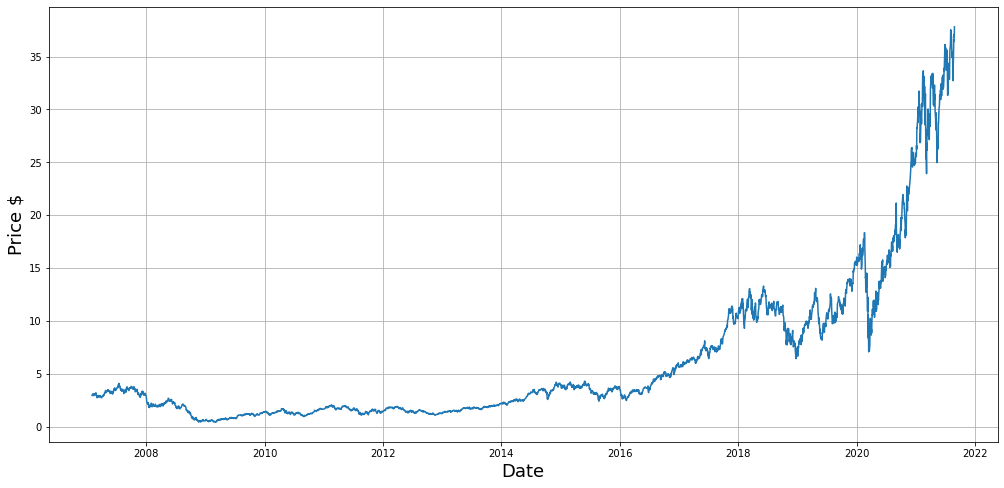

In [149]:
#plotting dataset
plt.figure(figsize=(17,8))
plt.plot(ds['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price $',fontsize=18)
plt.grid(True)

<AxesSubplot:title={'center':'Histogram of different values'}, xlabel='Open', ylabel='Frequency'>

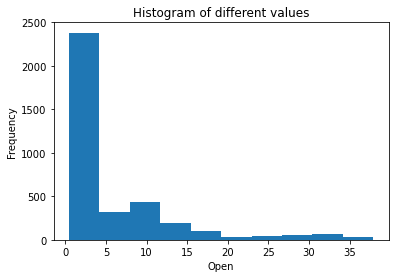

In [151]:
#plotting 2
plt.title('Histogram of different values')
plt.xlabel('Open')
ds['Open'].plot.hist()

In [152]:
#train_spliting data
x=ds[["Open"]]
y=ds[["Close"]]
x_train, x_test ,y_train, y_test =train_test_split(x,y, test_size=0.35,random_state=40)
x_train, x_test ,y_train, y_test

(                 Open
 Date                 
 2013-03-06   1.514583
 2007-07-03   3.618750
 2018-07-13  11.355000
 2020-10-21  21.102501
 2013-08-07   1.750417
 ...               ...
 2019-04-04  11.265000
 2015-11-13   3.303333
 2015-04-01   3.677917
 2016-02-03   2.742083
 2020-07-31  16.190001
 
 [2385 rows x 1 columns],
                  Open
 Date                 
 2021-06-24  33.330002
 2020-12-08  26.275000
 2019-02-27   9.752500
 2012-02-21   1.855833
 2021-02-10  30.872499
 ...               ...
 2016-04-26   3.367083
 2010-10-07   1.212083
 2012-09-07   1.483750
 2021-05-10  29.295000
 2017-09-12   7.643333
 
 [1285 rows x 1 columns],
                 Close
 Date                 
 2013-03-06   1.512917
 2007-07-03   3.629167
 2018-07-13  11.265000
 2020-10-21  20.637501
 2013-08-07   1.752500
 ...               ...
 2019-04-04  11.360000
 2015-11-13   3.290000
 2015-04-01   3.627083
 2016-02-03   2.777500
 2020-07-31  16.135000
 
 [2385 rows x 1 columns],
                 Cl

In [122]:
#testing model performance
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 4.691741662097337e-05
R squared 0.9713872686343441


In [153]:
x_train

,Open
Date,
2013-03-06,1.514583
2007-07-03,3.618750
2018-07-13,11.355000
2020-10-21,21.102501
2013-08-07,1.750417
...,...
2019-04-04,11.265000
2015-11-13,3.303333
2015-04-01,3.677917


In [154]:
x_test

,Open
Date,
2021-06-24,33.330002
2020-12-08,26.275000
2019-02-27,9.752500
2012-02-21,1.855833
2021-02-10,30.872499
...,...
2016-04-26,3.367083
2010-10-07,1.212083
2012-09-07,1.483750


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

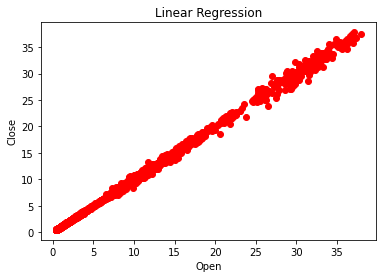

In [155]:
#plotting regression
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Close")
plt.xlabel("Open")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [156]:
#2
lr=LinearRegression()
pf=PolynomialFeatures(degree=3)
x_train_fit = pf.fit_transform(x_train)
lr.fit(x_train_fit, y_train)
x_test_ = pf.fit_transform(x_test)
predicted = lr.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.07331850498158819
R squared:  0.9984850951424531


In [157]:
#multi_linearRegression
x=ds[["High","Low"]] 
y=ds["Close"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.022791812184040056
R squared 0.9995290762270921


In [158]:
#Polynomial Regression
x= ds[["High", "Low"]]
y= ds["Close"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.023892789828275977
R squared:  0.9995063278584269


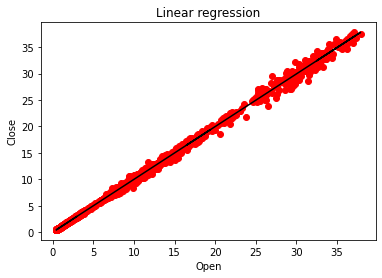

In [159]:
#plotting Polynomial Regression
x= ds["Open"].values.reshape(-1,1)
y= ds["Close"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Close")
plt.xlabel("Open")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [160]:
#KNN
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) 
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)  
print('Acuuracy=',accuracy_score(y_pred,y_test))


ValueError: Unknown label type: 'continuous'

In [161]:
x=ds.drop(["Open", "High", "Low"], axis=1)
y= ds["Close"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

ValueError: Unknown label type: 'continuous'